# Feature Visualization

In [31]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [341]:
sns.set(context='poster')
sns.set_palette("Set1")
sns.set_style("white")

In [342]:
df = pd.DataFrame()
for f in os.listdir('../data/interim'):
    df = df.append(pd.read_csv('../data/interim/' + f))
df = df.drop('Unnamed: 0', axis=1)

def gender_unknown(gender):
    if gender == 'unknown':
        return 1
    return np.nan
df['gender_missing'] = df.gender.apply(gender_unknown)

In [343]:
n = df.shape[0]
print("Number of retweets: {}".format(n))

Number of retweets: 21264


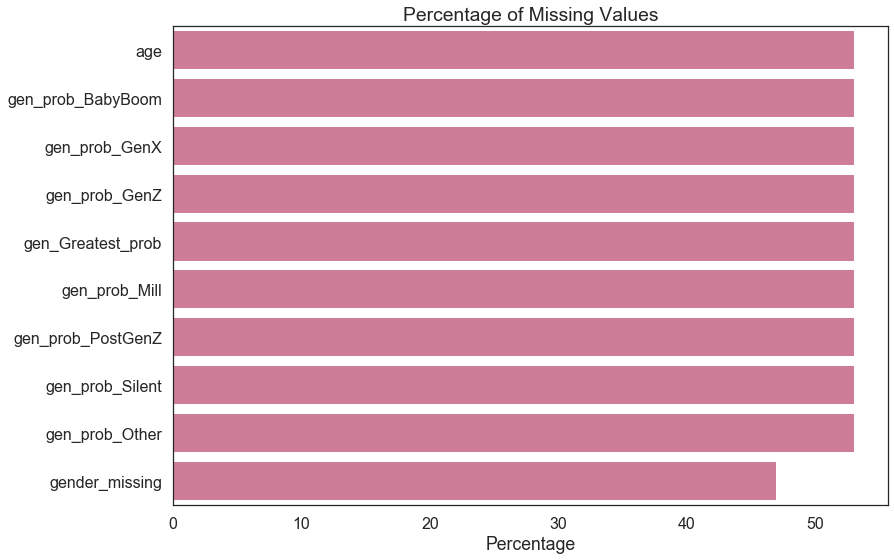

In [344]:
df_null = pd.DataFrame(round(np.mean(df.isnull()) * 100, 0))
df_null = df_null[df_null > 0].dropna().T
sns.barplot(data=df_null, orient="h", color='palevioletred')
plt.title("Percentage of Missing Values")
plt.xlabel("Percentage")
plt.savefig("../figures/exploratory_missing_values", 
            bbox_inches='tight', pad_inches=0.2)
plt.show()

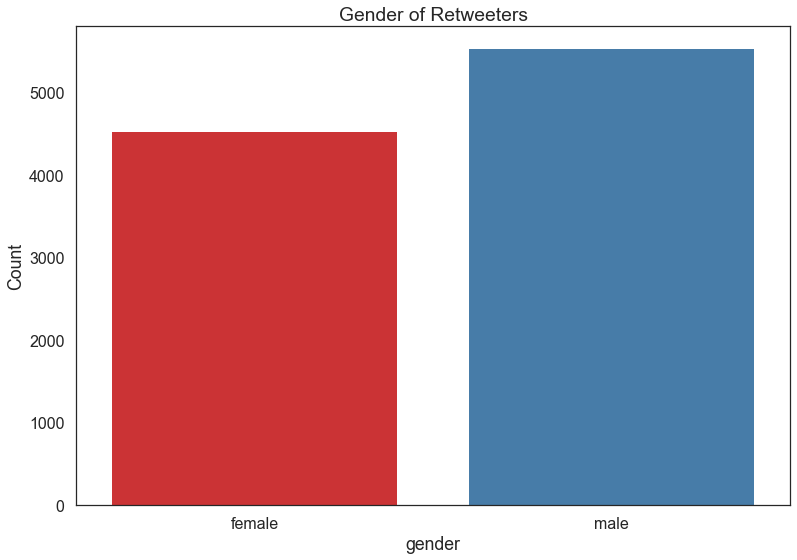

In [345]:
df_gender = pd.DataFrame(df[df.gender_missing.isnull()].groupby('gender').count()['first_name']).T
sns.barplot(data=df_gender)
plt.title("Gender of Retweeters")
plt.ylabel("Count")
plt.savefig("../figures/exploratory_gender")
plt.show()

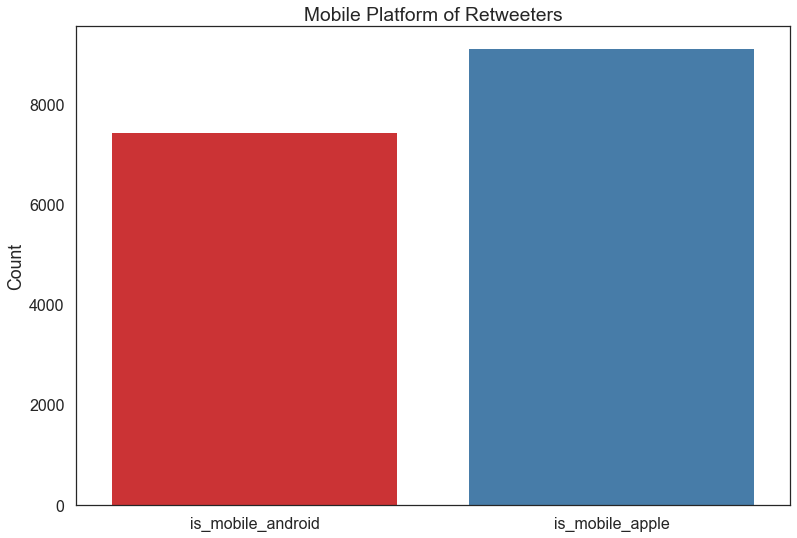

In [346]:
df_mobile = pd.DataFrame(df[['is_mobile_android', 'is_mobile_apple', ]].sum()).T
sns.barplot(data=df_mobile)
plt.title("Mobile Platform of Retweeters")
plt.ylabel("Count")
plt.savefig("../figures/exploratory_mobile")
plt.show()

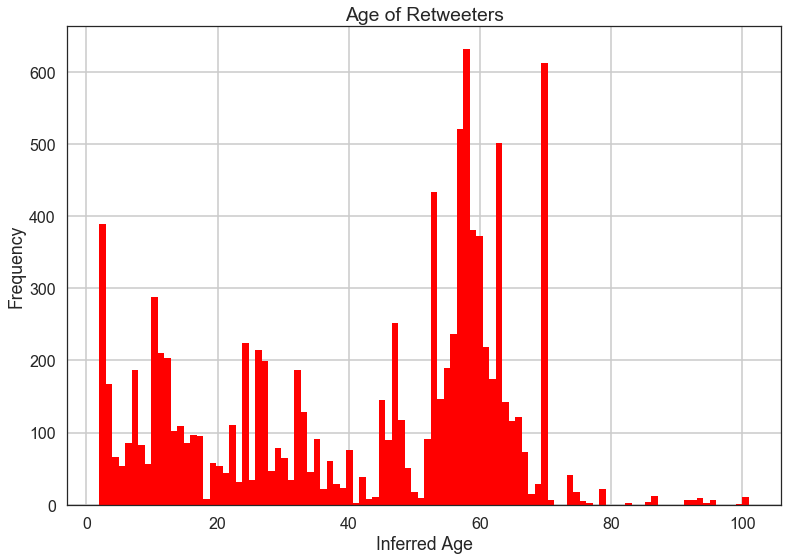

In [347]:
df.age.hist(bins=100, color='red')
plt.title("Age of Retweeters")
plt.xlabel("Inferred Age")
plt.ylabel("Frequency")
plt.savefig("../figures/exploratory_age")
plt.show()

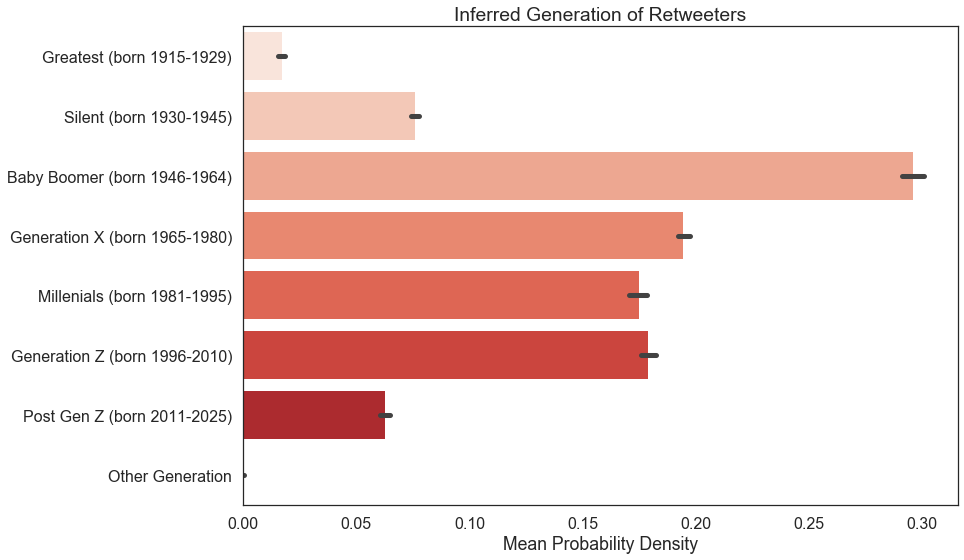

In [348]:
df_gen = df[['gen_Greatest_prob','gen_prob_Silent', 
             'gen_prob_BabyBoom', 'gen_prob_GenX', 
             'gen_prob_GenZ', 'gen_prob_Mill', 
             'gen_prob_PostGenZ', 'gen_prob_Other']]
f = sns.barplot(data=df_gen , orient='h', palette='Reds')
f.set(yticklabels=['Greatest (born 1915-1929)',
                   'Silent (born 1930-1945)',
                   'Baby Boomer (born 1946-1964)',
                   'Generation X (born 1965-1980)',
                   'Millenials (born 1981-1995)',
                   'Generation Z (born 1996-2010)',
                   'Post Gen Z (born 2011-2025)',
                   'Other Generation'])
plt.title("Inferred Generation of Retweeters")
plt.xlabel("Mean Probability Density")
plt.savefig("../figures/exploratory_generations")
plt.show()

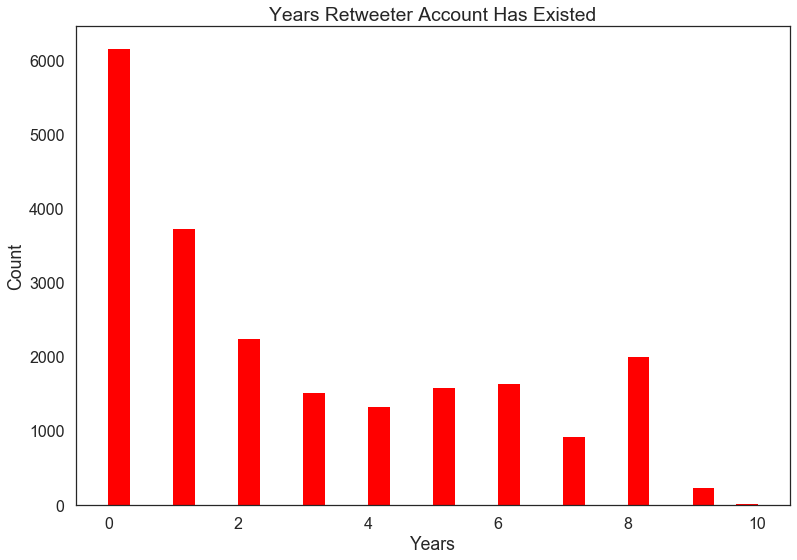

In [369]:
df['years_user_exist'].hist(color='r', bins=30, grid=False)
plt.title("Years Retweeter Account Has Existed")
plt.xlabel("Years")
plt.ylabel("Count")
plt.savefig("../figures/exploratory_userYears")
plt.show()

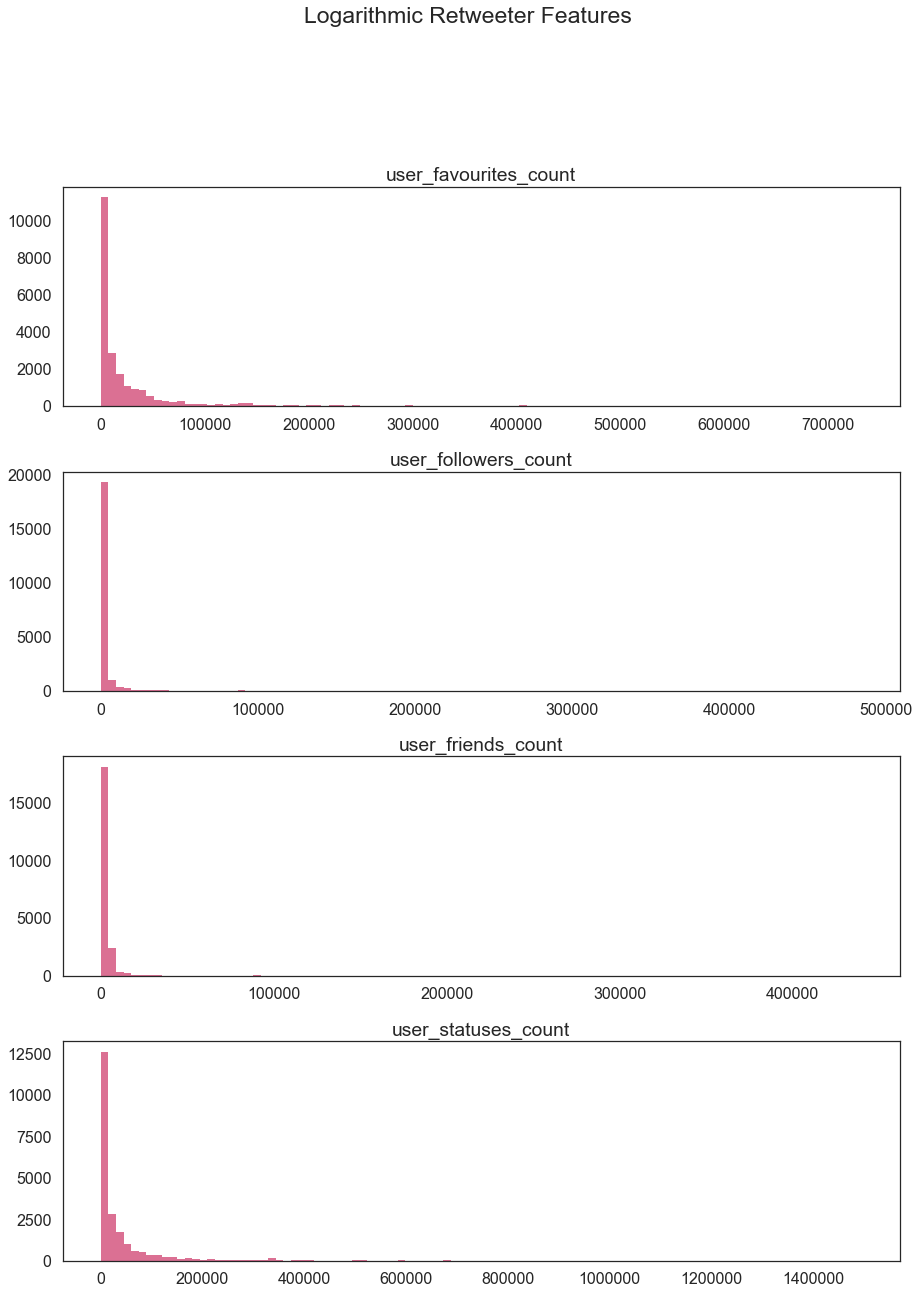

In [355]:
df_user = df[['user_favourites_count', 'user_followers_count', 'user_friends_count', 'user_statuses_count']]
df_user.hist(bins=100, grid=False, layout=(5,1), figsize=(15,25), color='palevioletred')
plt.suptitle("Logarithmic Retweeter Features")
plt.savefig("../figures/exploratory_logFeatures")
plt.show()

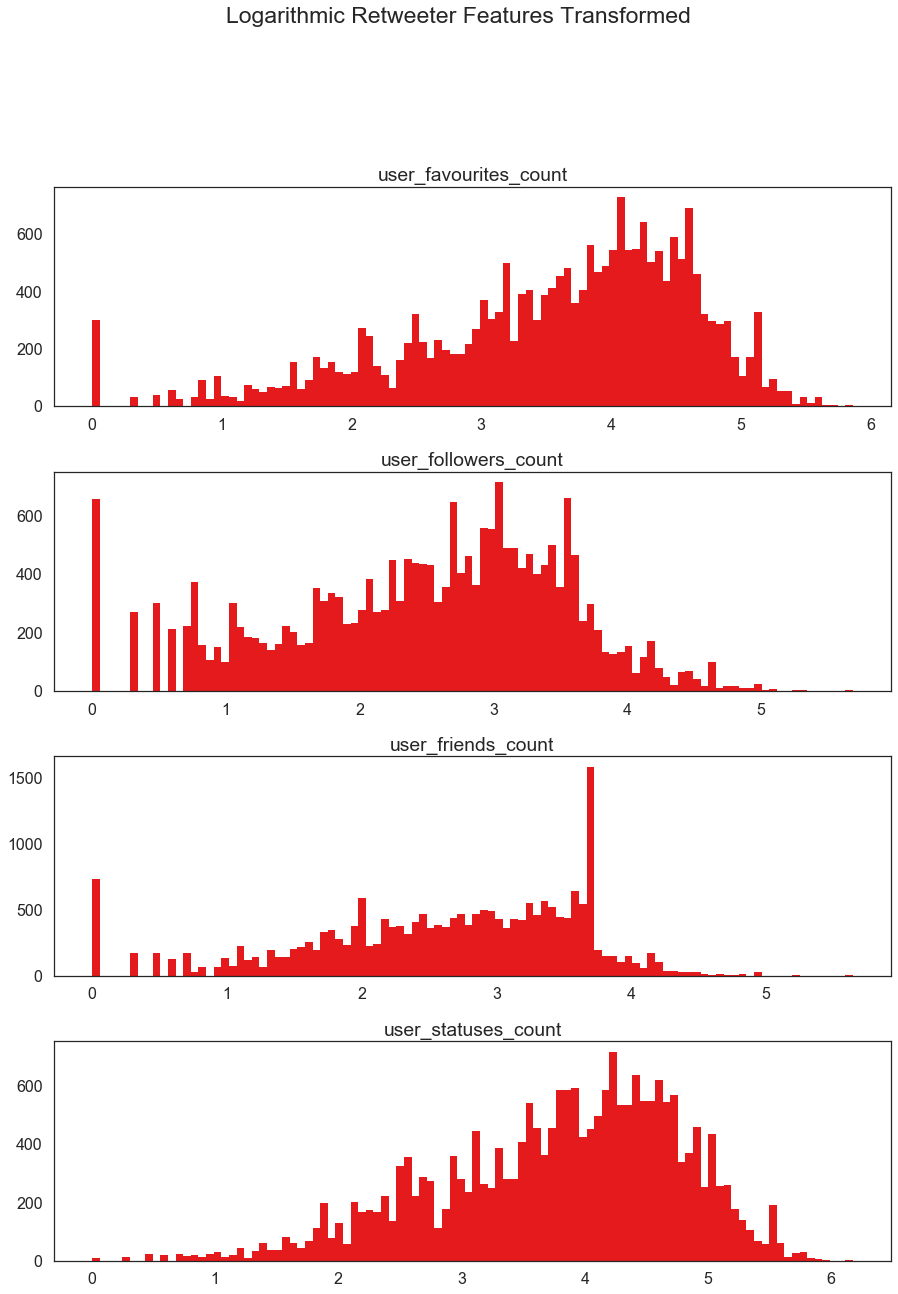

In [356]:
df_user = df[['user_favourites_count', 'user_followers_count', 'user_friends_count', 'user_statuses_count']]
df_user.apply(np.log10).replace(-np.inf, 0).hist(bins=100, grid=False, layout=(5,1), figsize=(15,25))
plt.suptitle("Logarithmic Retweeter Features Transformed")
plt.savefig("../figures/exploratory_logFeaturesTransformed")
plt.show()